# Algorithms

## Implementation

In [2]:
import string

LOWERCASE_LATIN = string.ascii_lowercase
UPPERCASE_LATIN = string.ascii_uppercase

# -----------------------------------
# NAIVE

def naive(text, pattern):
    res = []

    for i in range(len(text) - len(pattern) + 1):
        if text[i:i+len(pattern)] == pattern:
            res.append(i)
    
    return res

# -----------------------------------
# AUTOMAT

def AutomatTransition(pattern, alphabet):
    result = []
    for q in range(0, len(pattern) + 1):
        result.append({})
        for a in alphabet:
            k = min(len(pattern) + 1, q + 2)
            while True:
                k = k - 1
                if(k == 0 or pattern[:k] == (pattern[:q] + a)[-k:]):
                    break
            result[q][a] = k
    return result

def automat(text, delta):

    res = []

    q = 0
    length = len(delta) - 1
    for i in range(0, len(text)):
        q = delta[q][text[i]]
        if(q == length):
            res.append(i + 1 - q)

    return res

# -----------------------------------
# KMP

def KMPprefix(pattern):
    pi = [0]
    k = 0
    for q in range(1, len(pattern)):
        while k > 0 and pattern[k] != pattern[q]:
            k = pi[k - 1]
        if pattern[k] == pattern[q]:
            k += 1
        pi.append(k)

    return pi

def KMP(text, pattern, pi):

    res = []

    q = 0
    for i in range(len(text)):
        while q > 0 and pattern[q] != text[i] :
            q = pi[q-1]
        if pattern[q] == text[i] :
            q = q + 1
        if q == len(pattern):
            res.append(i + 1 - q)
            q = pi[q-1]
    
    return res

## Benchmark functions

### Implementation

In [3]:
from time import time

def benchmark(text, pattern):
    
    # naive
    print(15*'-' + 'BENCHMARK' + 14*'-')
    print("Benchmarking naive method.")
    textPrompt = [text[i] if i < 10 else '...' for i in range(min(11, len(text)))]
    print("Text:", ''.join(textPrompt) +', length =', str(len(text)) + ".")
    patternPrompt = [pattern[i] if i < 10 else '...' for i in range(min(11, len(pattern)))]
    print(f"Pattern:", ''.join(patternPrompt) +', length =', str(len(pattern)) + ".")

    start = time()
    solution = naive(text, pattern)
    end = time()
    
    print("Benchmark took:", end - start, "s.")
    print('Found', len(solution), 'matches.')
    print(10*'-' + 'BENCHMARK FINISHED' + 10*'-')
    print()

    # automata
    print(15*'-' + 'BENCHMARK' + 14*'-')
    print("Benchmarking automat method.")
    textPrompt = [text[i] if i < 10 else '...' for i in range(min(11, len(text)))]
    print("Text:", ''.join(textPrompt) +', length =', str(len(text)) + ".")
    patternPrompt = [pattern[i] if i < 10 else '...' for i in range(min(11, len(pattern)))]
    print(f"Pattern:", ''.join(patternPrompt) +', length =', str(len(pattern)) + ".")

    preprocessingStart = time()
    alphabet = set(text)
    delta = AutomatTransition(pattern, alphabet)
    preprocessingEnd = time()
    start = time()
    solution = automat(text, delta)
    end = time()
    
    print("Preprocessing took:", preprocessingEnd - preprocessingStart, "s.")
    print("Finding patterns in text took:", end - start, "s.")
    print("Benchmark took:", end - start + preprocessingEnd - preprocessingStart, "s.")
    print('Found', len(solution), 'matches.')
    print(10*'-' + 'BENCHMARK FINISHED' + 10*'-')
    print()

    # kmp
    print(15*'-' + 'BENCHMARK' + 14*'-')
    print("Benchmarking KMP method.")
    textPrompt = [text[i] if i < 10 else '...' for i in range(min(11, len(text)))]
    print("Text:", ''.join(textPrompt) +', length =', str(len(text)) + ".")
    patternPrompt = [pattern[i] if i < 10 else '...' for i in range(min(11, len(pattern)))]
    print(f"Pattern:", ''.join(patternPrompt) +', length =', str(len(pattern)) + ".")

    preprocessingStart = time()
    prefix = KMPprefix(pattern)
    preprocessingEnd = time()
    start = time()
    solution = KMP(text, pattern, prefix)
    end = time()
    
    print("Preprocessing took:", preprocessingEnd - preprocessingStart, "s.")
    print("Finding patterns in text took:", end - start, "s.")
    print("Benchmark took:", end - start + preprocessingEnd - preprocessingStart, "s.")
    print('Found', len(solution), 'matches.')
    print(10*'-' + 'BENCHMARK FINISHED' + 10*'-')
    print()


text = 'abbabbabbabababbabbbababababbababababbababbbabbabbabababbababababbabba'
pattern = 'ab'

benchmark(text, pattern)


---------------BENCHMARK--------------
Benchmarking naive method.
Text: abbabbabba..., length = 70.
Pattern: ab, length = 2.
Benchmark took: 0.0 s.
Found 27 matches.
----------BENCHMARK FINISHED----------

---------------BENCHMARK--------------
Benchmarking automat method.
Text: abbabbabba..., length = 70.
Pattern: ab, length = 2.
Preprocessing took: 0.0 s.
Finding patterns in text took: 0.0 s.
Benchmark took: 0.0 s.
Found 27 matches.
----------BENCHMARK FINISHED----------

---------------BENCHMARK--------------
Benchmarking KMP method.
Text: abbabbabba..., length = 70.
Pattern: ab, length = 2.
Preprocessing took: 0.0 s.
Finding patterns in text took: 0.0 s.
Benchmark took: 0.0 s.
Found 27 matches.
----------BENCHMARK FINISHED----------



### Usage

In [4]:
with open('pan-tadeusz.txt', 'r',encoding="utf8") as file:
    tadeusz = file.read()

pattern1 = 'pani'
pattern2 = 'pan'

# case sensitive
benchmark(tadeusz, pattern1)
benchmark(tadeusz, pattern2)

# case insensitive
benchmark(tadeusz.lower(), pattern1)
benchmark(tadeusz.lower(), pattern2)

---------------BENCHMARK--------------
Benchmarking naive method.
Text: Adam Micki..., length = 447342.
Pattern: pani, length = 4.
Benchmark took: 0.05425143241882324 s.
Found 100 matches.
----------BENCHMARK FINISHED----------

---------------BENCHMARK--------------
Benchmarking automat method.
Text: Adam Micki..., length = 447342.
Pattern: pani, length = 4.
Preprocessing took: 0.005805492401123047 s.
Finding patterns in text took: 0.03180384635925293 s.
Benchmark took: 0.03760933876037598 s.
Found 100 matches.
----------BENCHMARK FINISHED----------

---------------BENCHMARK--------------
Benchmarking KMP method.
Text: Adam Micki..., length = 447342.
Pattern: pani, length = 4.
Preprocessing took: 0.0 s.
Finding patterns in text took: 0.043501853942871094 s.
Benchmark took: 0.043501853942871094 s.
Found 100 matches.
----------BENCHMARK FINISHED----------

---------------BENCHMARK--------------
Benchmarking naive method.
Text: Adam Micki..., length = 447342.
Pattern: pan, length = 3.
Be

# Visualization

W wizualizacji pierwszy wiersz przesdstawia czasy preprocesingu ze wspólną skalą po lewej stronie. Niżej znajdują się czasy faktycznego znajduwania patternu, a następnie czasy całkowite, będące sumą poprzednich.

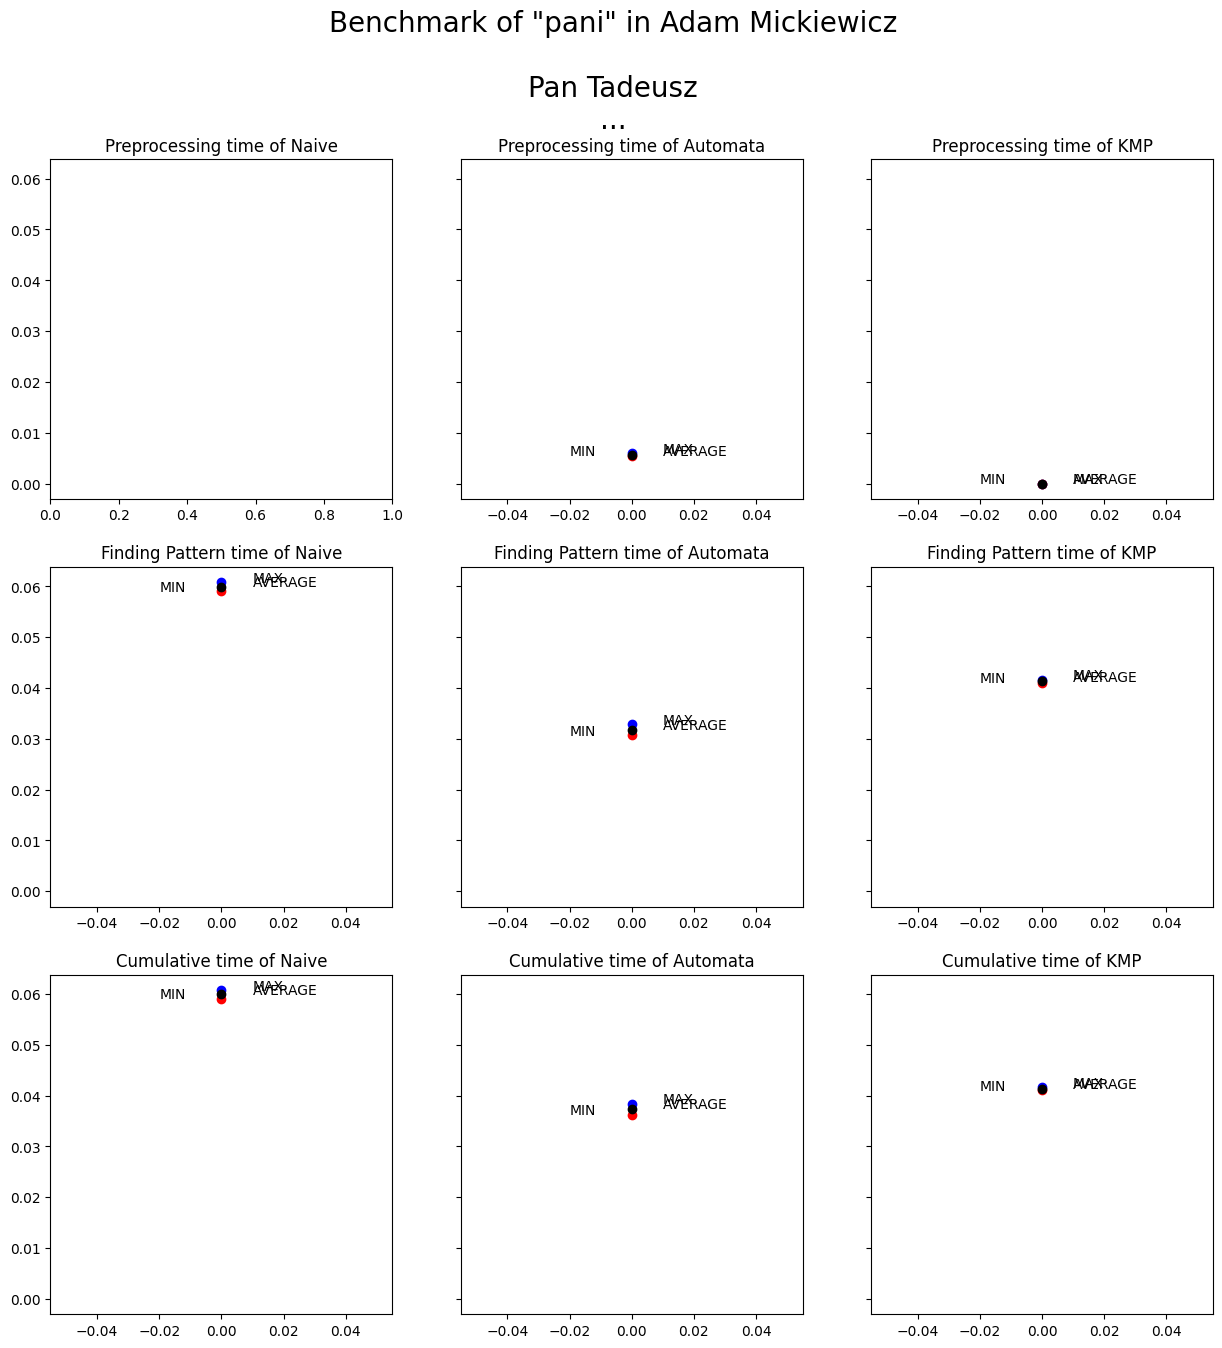

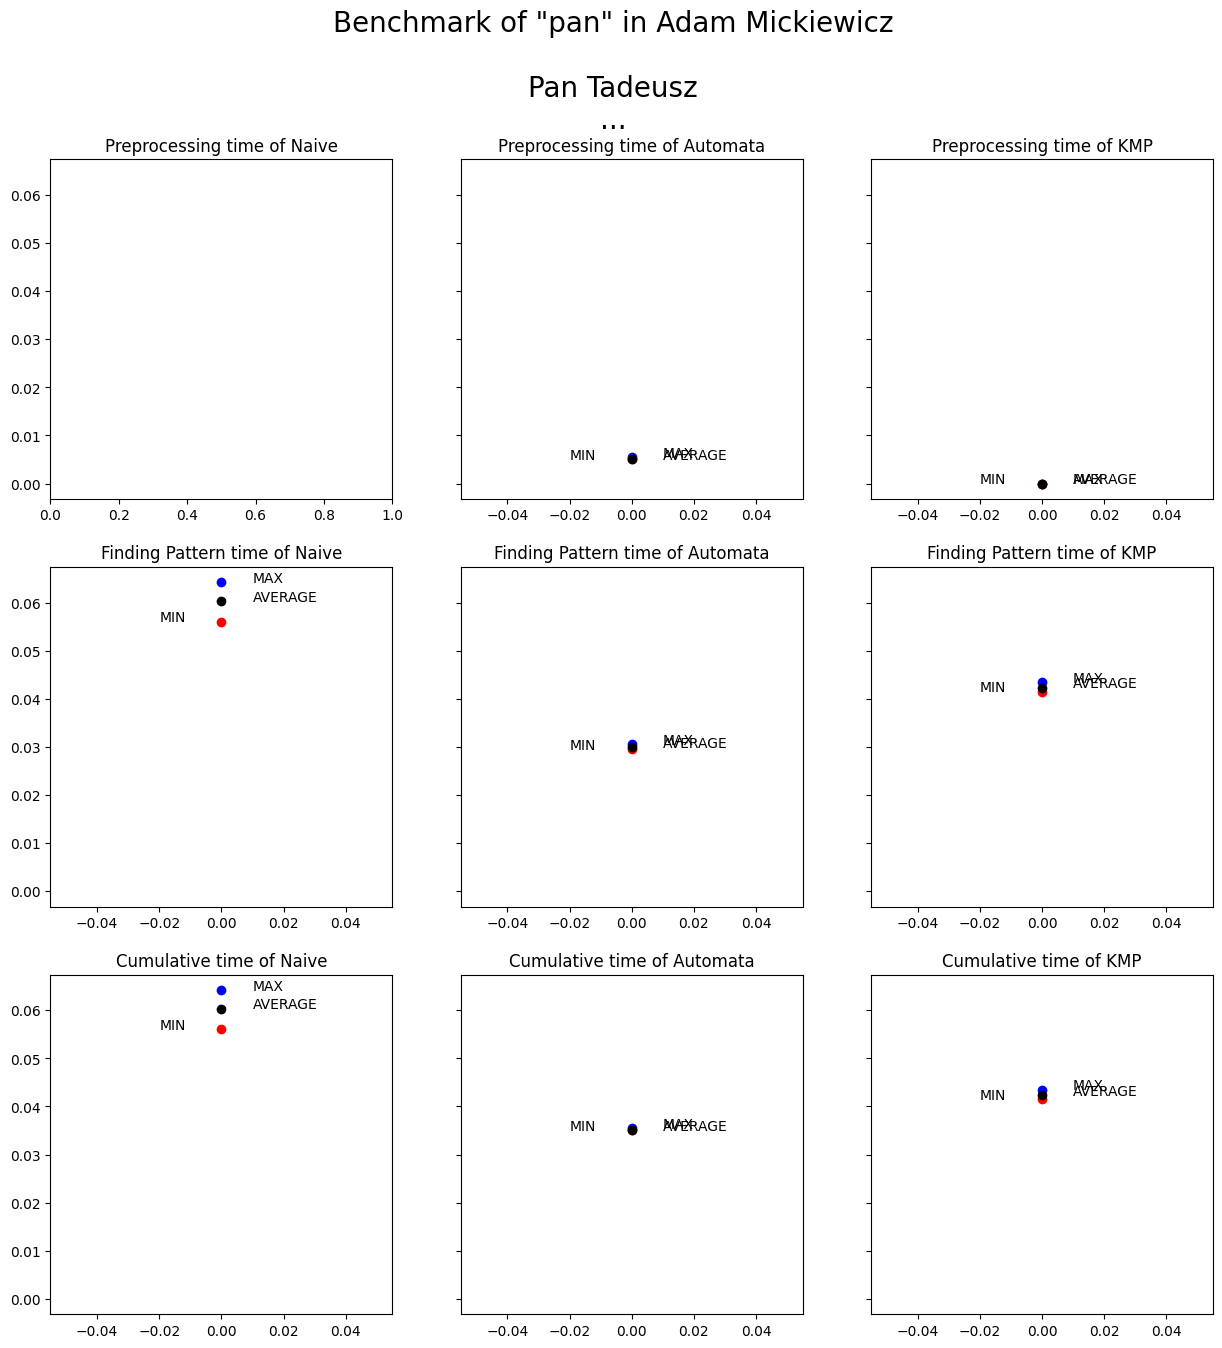

In [5]:
import matplotlib.pyplot as plt


def visualize(text, pattern):
    figure, axis = plt.subplots(3, 3, figsize=(15, 15), sharey=True)
    figure.suptitle(f"Benchmark of \"{pattern}\" in {text[:29]}...", fontsize='20')
    data = [[[] for i in range(3)] for j in range(3)]

    args1 = ["Preprocessing", "Finding Pattern", "Cumulative"]
    args2 = ["Naive", "Automata", "KMP"]

    # naive
    for i in range(5):
        start = time()
        naive(text, pattern)
        end = time()
        data[1][0].append(end - start)
        data[2][0].append(end - start)

    # automat
    for i in range(5):
        preprocessingStart = time()
        alphabet = set(text)
        delta = AutomatTransition(pattern, alphabet)
        preprocessingEnd = time()
        start = time()
        solution = automat(text, delta)
        end = time()
        data[0][1].append(preprocessingEnd - preprocessingStart)
        data[1][1].append(end - start)
        data[2][1].append(end - start + preprocessingEnd - preprocessingStart)

    for i in range(5):
        preprocessingStart = time()
        prefix = KMPprefix(pattern)
        preprocessingEnd = time()
        start = time()
        KMP(text, pattern, prefix)
        end = time()
        data[0][2].append(preprocessingEnd - preprocessingStart)
        data[1][2].append(end - start)
        data[2][2].append(end - start + preprocessingEnd - preprocessingStart)

    for i in range(3):
        for j in range(3):
            if len(data[i][j]) != 0 :
                M = max(data[i][j])
                m = min(data[i][j])
                avg = sum(data[i][j]) / len(data[i][j])

                axis[i][j].scatter([0], [M], c="blue")
                axis[i][j].scatter([0], [m], c="red")
                axis[i][j].scatter([0], [avg], c="black")

                axis[i][j].text(0.01, M, "MAX")
                axis[i][j].text(-0.02, m, "MIN")
                axis[i][j].text(0.01, avg, "AVERAGE")

            title = args1[i] + ' time of ' + args2[j]
            axis[i][j].set_title(title)

    plt.show()

visualize(tadeusz, pattern1)
visualize(tadeusz, pattern2)

In [11]:
import random
# jezeli pattern bedzie bodobnego rzedu wielkosci co text
pattern = 10000*'a'
text = 10000*'b' + pattern + 10000*'b'

# benchmark(text, pattern)



-1
